In [1]:
#Import drive
from google.colab import drive
#Mount Google Drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
%cd drive/MyDrive/Colab Notebooks/Sebastian

/content/drive/MyDrive/Colab Notebooks/Sebastian


Stuff for commiting to Github below

In [ ]:
ROOT = '/content/drive"'

In [ ]:
from os.path import join  

# path to your project on Google Drive
MY_GOOGLE_DRIVE_PATH = 'drive/MyDrive/Colab Notebooks/Sebastian' 
# replace with your Github username 
GIT_USERNAME = "ahhuang007" 
# definitely replace with your
GIT_TOKEN = "new token"  
# Replace with your github repository in this case we want 
# to clone deep-learning-v2-pytorch repository
GIT_REPOSITORY = "Sebastian" 

PROJECT_PATH = join(ROOT, MY_GOOGLE_DRIVE_PATH)

# It's good to print out the value if you are not sure 
print("PROJECT_PATH: ", PROJECT_PATH)   

# In case we haven't created the folder already; we will create a folder in the project path     

#GIT_PATH = "https://{GIT_TOKEN}@github.com/{GIT_USERNAME}/{GIT_REPOSITORY}.git" this return 400 Bad Request for me
#GIT_PATH = "https://" + GIT_TOKEN + "@github.com/" + GIT_USERNAME + "/" + GIT_REPOSITORY + ".git"
#print("GIT_PATH: ", GIT_PATH)

PROJECT_PATH:  /content/drive"/drive/MyDrive/Colab Notebooks/Sebastian


In [22]:
!git add .

In [23]:
!git config --global user.email "ahhuang007@gmail.com"
!git config --global user.name "ahhuang007"

In [24]:
!git commit -m "testing model with even more increased penalty for deviation"

[main 92dab22] testing model with even more increased penalty for deviation
 8 files changed, 502104 insertions(+), 1 deletion(-)
 rewrite colab.ipynb (95%)
 create mode 100644 data/episode_rewards/ppo_cum_rewards_v18.csv
 create mode 100644 data/timestep_rewards/ppo_rewards_v18.csv
 create mode 100644 models/random_model_ppo_v18.zip
 create mode 100644 models/real_model_ppo_v18.zip


In [ ]:
!git remote set-url origin https://$git_key@github.com/ahhuang007/Sebastian.git

Had to reset the remote origin URL here, removed the code since it contained the personal authorization token. Now I set the git key as an environment variable.

--------

Command for pulling from github

In [3]:
!git pull origin

remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 21 (delta 12), reused 21 (delta 12), pack-reused 0
Unpacking objects: 100% (21/21), done.
From https://github.com/ahhuang007/Sebastian
   92dab22..0519682  main       -> origin/main
Updating 92dab22..0519682
Fast-forward
 gym-seb/gym_seb/__pycache__/__init__.cpython-37.pyc   | Bin 351 -> 344 bytes
 .../gym_seb/envs/__pycache__/__init__.cpython-37.pyc  | Bin 287 -> 280 bytes
 .../gym_seb/envs/__pycache__/seb_env.cpython-37.pyc   | Bin 5252 -> 5302 bytes
 gym-seb/gym_seb/envs/seb_env.py                       |   6 ++++--
 plotter.py                                            |   4 ++--
 viz.py                                                |   4 ++--
 6 files changed, 8 insertions(+), 6 deletions(-)


Pushing updates to github

In [25]:
!git push origin

Counting objects: 19, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (19/19), done.
Writing objects: 100% (19/19), 27.26 MiB | 3.83 MiB/s, done.
Total 19 (delta 6), reused 0 (delta 0)
remote: Resolving deltas: 100% (6/6), completed with 6 local objects.
remote: warning: See http://git.io/iEPt8g for more information.
remote: warning: File data/timestep_rewards/ppo_rewards_v18.csv is 60.71 MB; this is larger than GitHub's recommended maximum file size of 50.00 MB
remote: warning: GH001: Large files detected. You may want to try Git Large File Storage - https://git-lfs.github.com.
To https://github.com/ahhuang007/Sebastian.git
   5c6b6e9..92dab22  main -> main


Installing stable_baselines since it might be better

In [4]:
!pip install stable-baselines3[extra]

     |████████████████████████████████| 176 kB 5.8 MB/s 
     |████████████████████████████████| 2.8 MB 57.9 MB/s 
Reason for being yanked: re-release with new wheels
  Attempting uninstall: atari-py
    Found existing installation: atari-py 0.2.9
    Uninstalling atari-py-0.2.9:
      Successfully uninstalled atari-py-0.2.9


Installing my custom environment

In [ ]:
cd Sebastian

[Errno 2] No such file or directory: 'Sebastian'
/content/drive/MyDrive/Colab Notebooks/Sebastian


In [5]:
%cd gym-seb

/content/drive/MyDrive/Colab Notebooks/Sebastian/gym-seb


In [6]:
!pip install -e .

Obtaining file:///content/drive/MyDrive/Colab%20Notebooks/Sebastian/gym-seb
     |████████████████████████████████| 631 kB 5.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 90.8 MB 174 bytes/s 
  Created wheel for gym: filename=gym-0.22.0-py3-none-any.whl size=708395 sha256=bf67e7ae87ff71ee1a0cd5224e84355679b3719ef43e29af5d602fbb6137690f
  Stored in directory: /root/.cache/pip/wheels/7d/5e/87/7d50e0179edda70feff5bba05c381041e1c1fd80c6b06a4cc3
Successfully built gym
  Attempting uninstall: gym
    Found existing installation: gym 0.17.3
    Uninstalling gym-0.17.3:
      Successfully uninstalled gym-0.17.3
  Running setup.py develop for gym-seb
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
stable-baselines3 1.4.0 requires gym<0.20,>=0.1

Restart runtime here

In [1]:
%cd drive/My Drive/Colab Notebooks/Sebastian

/content/drive/My Drive/Colab Notebooks/Sebastian


In [2]:
from stable_baselines3 import DDPG, PPO
import gym

In [3]:
import gym_seb
env = gym.make('seb-v0', episode_timesteps = 10000, use_gui = False)

In [4]:
from stable_baselines3.ddpg.policies import MlpPolicy
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.noise import NormalActionNoise, OrnsteinUhlenbeckActionNoise

In [5]:
'''
model finished running when "doneness" was achievable - do i need to do this?
I think the model will keep learning until it is done - if it is done but 
has not reached the number of total timesteps, it will reset and learn again
until it has surpassed the total_timesteps and is done again
'''

model = PPO('MlpPolicy', env, verbose = 1)
env.seed(4)
env.action_space.seed(4)
env.observation_space.seed(4)
model.set_random_seed(4)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [6]:
from stable_baselines3.common.callbacks import BaseCallback

class Recorder(BaseCallback):
  '''
  callback for recording data
  '''
  def __init__(self, li, li2, li3, log_dir, verbose = 1):
    super(Recorder, self).__init__(verbose)
    self.li = li
    self.log_dir = log_dir
    self.li2 = li2
    self.cum_reward = 0
    self.li3 = li3
  def _on_step(self) -> bool:
    self.li.append(self.locals['rewards'][0])
    self.li3[0].append(self.locals['infos'][0]['f_reward'])
    self.li3[1].append(self.locals['infos'][0]['d_reward'])
    self.li3[2].append(self.locals['infos'][0]['p_reward'])
    self.li3[3].append(self.locals['infos'][0]['y_reward'])
    self.li3[4].append(self.locals['infos'][0]['c_reward'])
    if self.locals['dones'][0] == False:
      self.cum_reward += self.locals['rewards'][0]
    else:
      self.li2.append(self.cum_reward)
      self.cum_reward = self.locals['rewards'][0]

In [7]:
from stable_baselines3.common.evaluation import evaluate_policy

#performance with random model
mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=10, deterministic=False)

print(f"mean_reward={mean_reward:.2f} +/- {std_reward}")

/usr/local/lib/python3.7/dist-packages/stable_baselines3/common/evaluation.py:69: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  UserWarning,


resetting environment
robot has flipped over at timestep 204
(0.12835469626591617, 0.013809413199829932, 0.048614741501088875)
resetting environment
robot has flipped over at timestep 457
(-0.16384542829458304, -0.009968104243762977, 0.17772996995222357)
resetting environment
robot has flipped over at timestep 520
(0.000996470269514034, -0.007972381067357042, 0.04537323581980836)
resetting environment
robot has flipped over at timestep 680
(0.01938537296598314, 0.005992356929902422, 0.031490982706257165)
resetting environment
robot has flipped over at timestep 821
(0.04930794801120957, -0.010977252552919162, 0.06472732849184523)
resetting environment
robot has flipped over at timestep 885
(-0.014186451720886027, 0.035689700303149975, 0.05473834860467627)
resetting environment
robot has flipped over at timestep 1022
(-0.03245071347230152, -0.029210280721335465, 0.04465723890320186)
resetting environment
robot has flipped over at timestep 1403
(0.12667869046153363, -0.12443551960849844, 

In [8]:
version = "19"

In [9]:
model.save("models/random_model_ppo_v" + version)

In [ ]:
#In case I want to load a previously trained model for more training
ppo_model = PPO.load("real_model_ppo_action", env = env)
ppo_model.set_random_seed(4)

In [10]:
ppo_model = PPO('MlpPolicy', env, verbose = 1)
ppo_model.set_random_seed(4)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [11]:
data = []
cum_data = []
rewards_data = [[],[],[],[],[]]
record = Recorder(data, cum_data, rewards_data, log_dir = "/")

In [16]:
env.reset()
#set total_timesteps equal to n_eval_episodes * max_timesteps
#model will go through 2048*x timsteps, where total_timesteps will be rounded up
#to nearest multiple of 2048
#action_noise = NormalActionNoise(mean=np.zeros(n_actions), sigma=0.1 * np.ones(n_actions))

ppo_model = ppo_model.learn(total_timesteps = 100000, log_interval = 10000, callback = record)
ppo_model.save("models/real_model_ppo_v" + version)

resetting environment
resetting environment
robot has flipped over at timestep 407661
(7.870818943570082, 7.353962237338329, 0.014630959863129983)
resetting environment
robot has flipped over at timestep 408993
(0.2953812545271107, 0.14313876591115549, 0.03600272667815932)
resetting environment
robot has flipped over at timestep 409109
(0.04753129834006406, -0.09064159019016509, 0.0457972329791983)
resetting environment
at episode 410000
(1.2394233569685877, 1.1418116136943042, 0.0527769976430188)
robot has flipped over at timestep 414400
(8.852840969544578, 6.148803020275768, 0.046640184300668686)
resetting environment
robot has flipped over at timestep 414488
(0.08797618811212345, 0.0025653941669818697, 0.028148676703856765)
resetting environment
robot has flipped over at timestep 415055
(0.15284878279251551, 0.12595801114883207, 0.06173393012632252)
resetting environment
robot has flipped over at timestep 415306
(0.4851813154542122, 0.18871349555928296, 0.005866937911557073)
resetti

In [17]:
from stable_baselines3.common.evaluation import evaluate_policy
mean_reward, std_reward = evaluate_policy(ppo_model, env, n_eval_episodes=10, deterministic=True)

print(f"mean_reward={mean_reward:.2f} +/- {std_reward}")

/usr/local/lib/python3.7/dist-packages/stable_baselines3/common/evaluation.py:69: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  UserWarning,


resetting environment
at episode 510000
(0.013401058108132618, 0.015171326791964803, 0.04370674964466366)
maximum timestep reached for episode
(0.013401058108612262, 0.015171326808472203, 0.04370674996760492)
resetting environment
at episode 520000
(0.002887748073498448, -0.0011290099696843567, 0.04482064008411674)
maximum timestep reached for episode
(0.002952214110355953, -0.0010479637866714787, 0.04475348645824328)
resetting environment
at episode 530000
(0.0038711043240117495, -0.0011012454551512828, 0.04469781958767822)
maximum timestep reached for episode
(0.0038711036739939747, -0.001101246044937169, 0.04469781831988827)
resetting environment
at episode 540000
(0.004351608002563337, -0.001020497752853836, 0.04452419394974777)
maximum timestep reached for episode
(0.004329062046534168, -0.0010317859792285246, 0.044535061145160745)
resetting environment
at episode 550000
(0.0044008125041737935, -0.0012566236411818829, 0.04467844470908413)
maximum timestep reached for episode
(0.00

Plotting

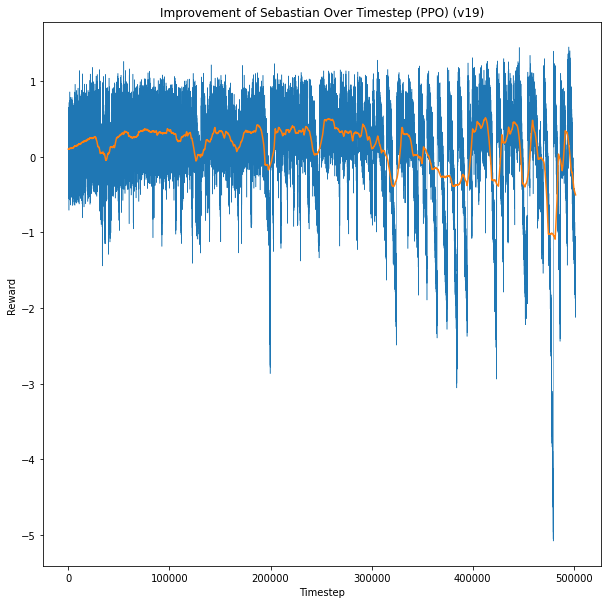

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage.filters import uniform_filter1d

%matplotlib inline
N = 10000
plt.rcParams["figure.figsize"]=(10,10)
xs = range(1, len(data) + 1)
plt.plot(xs, data, linewidth = 0.5)
y = uniform_filter1d(data, size=N)
plt.plot(xs, y)
plt.xlabel("Timestep")
plt.ylabel("Reward")
plt.title("Improvement of Sebastian Over Timestep (PPO) (v" + version + ")")
plt.show()

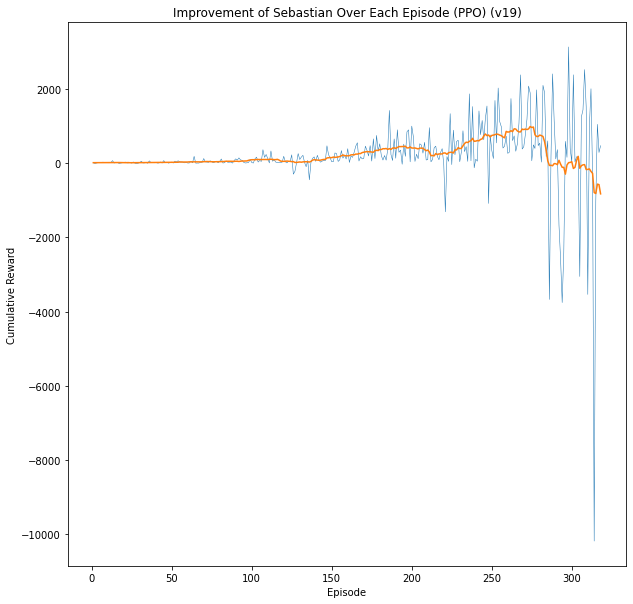

In [19]:
N = 20
plt.rcParams["figure.figsize"]=(10,10)
xs = range(1, len(cum_data) + 1)
plt.plot(xs, cum_data, linewidth = 0.5)
y = uniform_filter1d(cum_data, size=N)
plt.plot(xs, y)
plt.xlabel("Episode")
plt.ylabel("Cumulative Reward")
plt.title("Improvement of Sebastian Over Each Episode (PPO) (v" + version + ")")
plt.show()

In [20]:
import pandas as pd
df = pd.DataFrame(data = {"timestep":range(1,len(data) + 1), "reward":data, "f_reward":rewards_data[0], 
                          "d_reward":rewards_data[1], "p_reward":rewards_data[2], 
                          "y_reward":rewards_data[3], "c_reward":rewards_data[4]})
df2 = pd.DataFrame(data = {"episode":range(1, len(cum_data) + 1), "cumulative reward": cum_data})

In [21]:
df.to_csv("./data/timestep_rewards/ppo_rewards_v" + version + ".csv")
df2.to_csv("./data/episode_rewards/ppo_cum_rewards_v" + version + ".csv")